**Seeding for reproducibility**

In [64]:
#set seeds for reproducibility
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

**Importing the dependencies**

In [65]:
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt

**Data Curation**

In [66]:
#load and prepare Fashion MNIST dataset
fashion_mnist = datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

**Data Processing**

In [67]:
type(train_images)

numpy.ndarray

In [68]:
type(train_labels)

numpy.ndarray

In [69]:
print(len(train_images))

60000


In [70]:
print(len(test_images))

10000


In [71]:
print(len(train_labels))

60000


In [72]:
print(train_images[0].shape)

(28, 28)


In [73]:
print(type(train_images[0]))

<class 'numpy.ndarray'>


In [74]:
print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

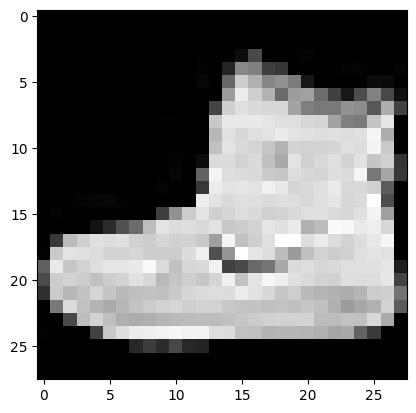

In [75]:
#display an image from the dataset
plt.imshow(train_images[0],cmap='gray')
plt.show()

In [76]:
print(train_labels[0])

9


**class_name** = ['T-shirt/top','Trouser','pullover','dress','coat','sandal','shirt','sneaker','bag','ankle boot']

In [77]:
#Normalize pixel values to be between 0 and 1(dividing each number by its maximum value) -> to reduce the reacing local optimals
train_images , test_images = train_images/255.0 , test_images/255.0

In [78]:
print(train_images[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

In [79]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


In [80]:
#reshape images to specify that it's a single channel (grayscale)
train_images = train_images.reshape((train_images.shape[0],28,28,1))
test_images = test_images.reshape(test_images.shape[0],28,28,1)

In [81]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


**Convolutional Neural Network**

In [82]:
#Build the convolutional base
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation = 'relu',input_shape=(28,28,1)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation = 'relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation = 'relu'))

#Add Dense layers on top
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [83]:
#compile and train the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

**Model Training**

In [84]:
history = model.fit(train_images,train_labels,epochs=5,validation_data=(test_images,test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7482 - loss: 0.6956 - val_accuracy: 0.8698 - val_loss: 0.3629
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8772 - loss: 0.3359 - val_accuracy: 0.8849 - val_loss: 0.3208
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8967 - loss: 0.2835 - val_accuracy: 0.8904 - val_loss: 0.3028
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9072 - loss: 0.2494 - val_accuracy: 0.8966 - val_loss: 0.2849
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9171 - loss: 0.2203 - val_accuracy: 0.8983 - val_loss: 0.2839


**Model Evaluation**

In [85]:
#Evaluate the model
test_loss , test_acc = model.evaluate(test_images,test_labels,verbose=2)
print("\n Test accuracy:",test_acc)

313/313 - 1s - 2ms/step - accuracy: 0.8983 - loss: 0.2839

 Test accuracy: 0.8982999920845032


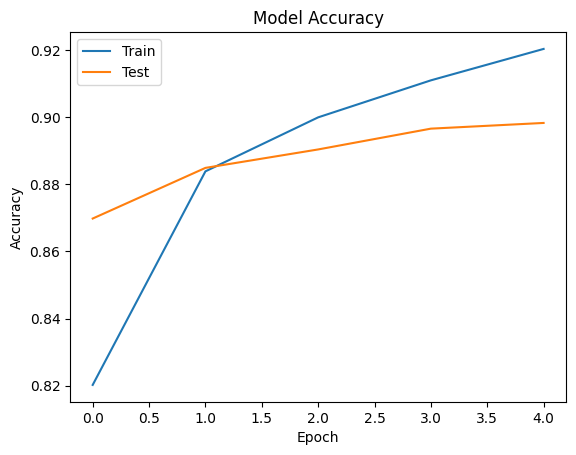

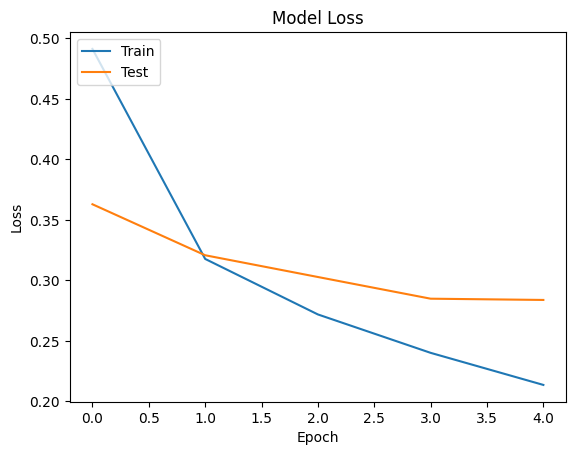

In [86]:
#plot train and validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Test'],loc='upper left')
plt.show()

#plot train and validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train','Test'],loc='upper left')
plt.show()

In [87]:
model.save('trained_fashion_mnist.h5')